Importing necessary libraries

In [ ]:
# Importing required library
import numpy as np # For numerical calculations
import pandas as pd # For creating data frame
import matplotlib.pyplot as plt # For data Visualization
import seaborn as sb # For data Visualization
from statsmodels.tsa.stattools import adfuller # To check the stationarity of the data

from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # plot acf and pacf

import statsmodels.api as sm #LJung Box test
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX # To build sarima model

from statsmodels.tsa.arima_model import ARIMA # Tobuild arima model

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Python_CSV files/

/content/drive/My Drive/Python_CSV files


In [ ]:
!pip install xlrd --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df=pd.read_excel("DS3_C6_S4_TimeSeries_Sales_Data_Project.xls")

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.shape

(9994, 21)

In [ ]:
df.info

<bound method DataFrame.info of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer 

In [ ]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

EDA(Exploratory Data Analysis)

1.1)Univariate Analysis:

Univariate Analysis on categorical columns

In [ ]:
def info_of_cat(col): 
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe
    if df[col].isnull().sum() > 0:  # check if null values are present
        print(f"\nThere are null values in the {col} column")

Analysis of Ship Mode

In [ ]:
info_of_cat("Ship Mode") #function returns all the information required for the level 1 analysis

Unique values in Ship Mode are: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Mode of Ship Mode is Standard Class
Number of missing values in Ship Mode is 0


([<matplotlib.patches.Wedge at 0x7fa0e5cef690>,
 [Text(-0.33056573952035373, 1.0491550370919267, 'Standard Class'),
  Text(-0.37607764230951635, -1.0337144707098356, 'Second Class'),
  Text(0.7465348771572817, -0.8078896441889587, 'First Class'),
  Text(1.0840144265772789, -0.18684946607452133, 'Same Day')],
 [Text(-0.1803085851929202, 0.5722663838683235, '59.72%'),
  Text(-0.20513325944155433, -0.5638442567508194, '19.46%'),
  Text(0.40720084208579, -0.4406670786485229, '15.39%'),
  Text(0.5912805963148793, -0.10191789058610252, '5.43%')])

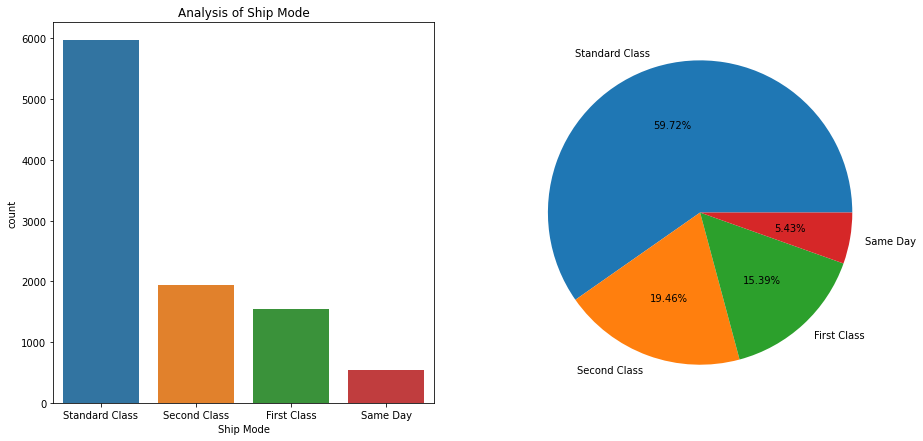

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Analysis of Ship Mode")                  # Set the title of the graph
percentage = df["Ship Mode"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Ship Mode"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Ship Mode"], ax = ax[0],order=['Standard Class','Second Class','First Class','Same Day'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

From the Pie chart and count plot we can make out that Standard class is the most prefered as ship mode as compared to other ship modes.

Analysis on Segment

In [ ]:
info_of_cat("Segment") #function returns all the information required for the level 1 analysis

Unique values in Segment are: ['Consumer' 'Corporate' 'Home Office']
Mode of Segment is Consumer
Number of missing values in Segment is 0


([<matplotlib.patches.Wedge at 0x7fa0e5be9f10>,
 [Text(-0.06704018356682018, 1.0979551966211223, 'Consumer'),
  Text(-0.5268843289816147, -0.9656049419268699, 'Corporate'),
  Text(0.9316986195588344, -0.5847543777622897, 'Home Office')],
 [Text(-0.03656737285462918, 0.5988846527024302, '51.94%'),
  Text(-0.28739145217178985, -0.5266936046873835, '30.22%'),
  Text(0.5081992470320914, -0.31895693332488523, '17.84%')])

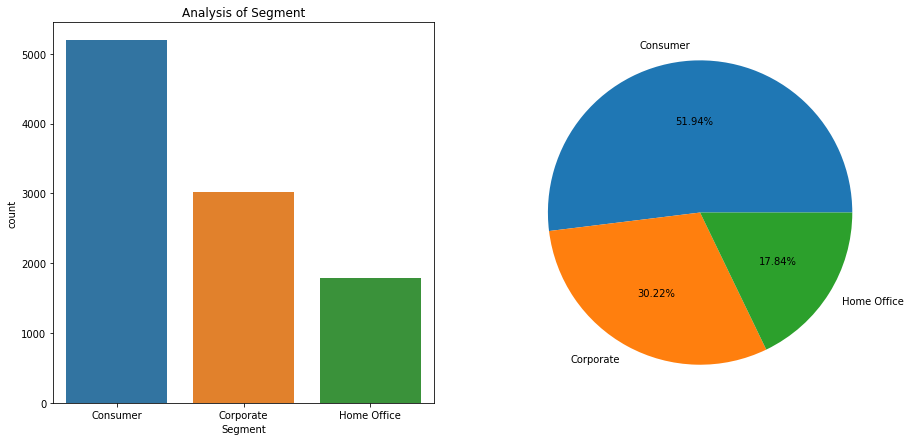

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Analysis of Segment")                  # Set the title of the graph
percentage = df["Segment"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Segment"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Segment"], ax = ax[0],order=['Consumer','Corporate','Home Office'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

From the pie chart count plot we make out that consumer segment has made more impact on sales of Furniture Store as compared to Corporate Segment and Home Office.

Analysis on Category 

In [ ]:
info_of_cat("Category") #function returns all the information required for the level 1 analysis

Unique values in Category are: ['Furniture' 'Office Supplies' 'Technology']
Mode of Category is Office Supplies
Number of missing values in Category is 0


([<matplotlib.patches.Wedge at 0x7fa0e618ef50>,
 [Text(-0.3496380660429372, 1.0429540846910543, 'Office Supplies'),
  Text(-0.27974354545119656, -1.0638343615330323, 'Furniture'),
  Text(0.9197467277963864, -0.6033787837733774, 'Technology')],
 [Text(-0.1907116723870566, 0.5688840461951205, '60.30%'),
  Text(-0.15258738842792538, -0.5802732881089266, '21.22%'),
  Text(0.5016800333434834, -0.32911570024002396, '18.48%')])

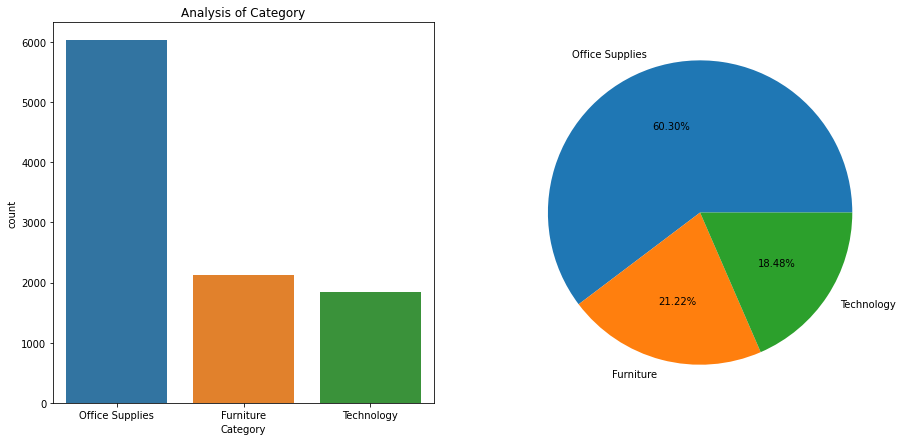

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Analysis of Category")                  # Set the title of the graph
percentage = df["Category"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Category"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Category"], ax = ax[0],order=['Office Supplies','Furniture','Technology'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

1)From the pie chart and count plot we can make out that in terms of product category Office Supplies is found to be the most in demand and essential category that has created a huge impact on the sales of the Furniture Stores.

2)More than 50% products that are sold belong to this category.

Analysis Of Sub-Category 

In [ ]:
info_of_cat("Sub-Category") #function returns all the information required for the level 1 analysis

Unique values in Sub-Category are: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
Mode of Sub-Category is Binders
Number of missing values in Sub-Category is 0


([<matplotlib.patches.Wedge at 0x7fa0e6209890>,
 [Text(0.9763276824947603, 0.5067388443709547, 'Binders'),
  Text(0.19978472989163298, 1.081705163943543, 'Paper'),
  Text(-0.5738784222686997, 0.9384367620966201, 'Furnishings'),
  Text(-0.9944482652289589, 0.470183631981287, 'Phones'),
  Text(-1.0940868088550497, -0.11390370797025917, 'Storage'),
  Text(-0.8953340580942692, -0.6390437578260567, 'Art'),
  Text(-0.4854447900078828, -0.9870883222154959, 'Accessories'),
  Text(-0.021437193482498344, -1.0997910923150787, 'Chairs'),
  Text(0.34701412694296424, -1.0438300607388218, 'Appliances'),
  Text(0.6045347489929012, -0.9189873433622958, 'Labels'),
  Text(0.786448767511178, -0.7690892900568498, 'Tables'),
  Text(0.9115071047427434, -0.6157554693248787, 'Envelopes'),
  Text(0.9940044193351475, -0.4711212310458919, 'Bookcases'),
  Text(1.0499830321338506, -0.3279262603558997, 'Fasteners'),
  Text(1.0832417906883753, -0.1912778683126777, 'Supplies'),
  Text(1.0965777941706178, -0.0867014494

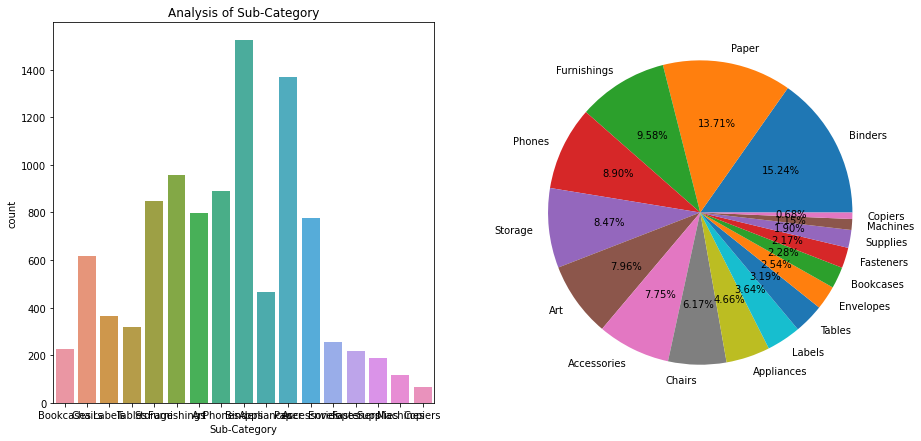

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Analysis of Sub-Category")                  # Set the title of the graph
percentage = df["Sub-Category"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Sub-Category"].value_counts().index) # Converting the index of value counts into list

sb.countplot(x = df["Sub-Category"], ax = ax[0],order=['Bookcases','Chairs','Labels','Tables','Storage','Furnishings','Art','Phones','Binders','Appliances','Paper','Accessories','Envelopes','Fasteners','Supplies','Machines','Copiers'])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

Interpretation:

1)From the pie chart and countplot we can make out that in the product sub-category Binders are in more demand in the market.

2)Are mostly prefered products in terms of product sub-category as compared to other products.

Analysis on Product Name  

In [ ]:
info_of_cat("Product Name") #function returns all the information required for the level 1 analysis

Unique values in Product Name are: ['Bush Somerset Collection Bookcase'
 'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back'
 'Self-Adhesive Address Labels for Typewriters by Universal' ...
 'Eureka Hand Vacuum, Bagless' 'LG G2'
 'Eldon Jumbo ProFile Portable File Boxes Graphite/Black']
Mode of Product Name is Staple envelope
Number of missing values in Product Name is 0


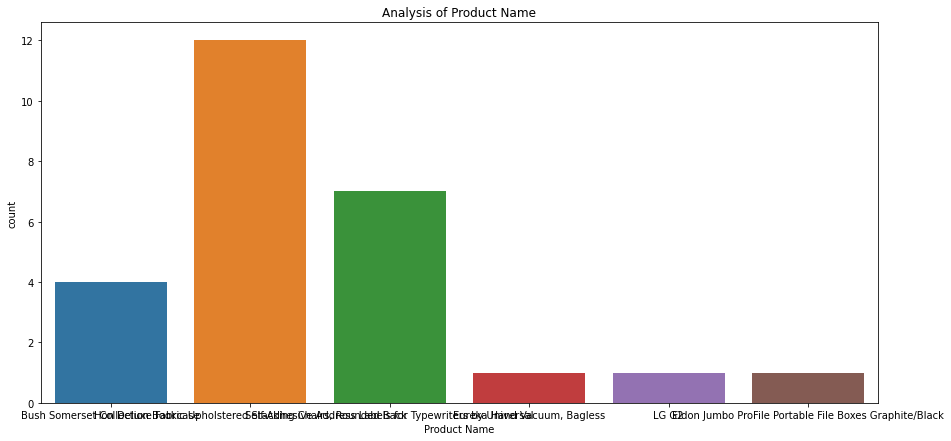

In [ ]:
fig, ax = plt.subplots(1,figsize = (15, 7))
plt.title("Analysis of Product Name")                  # Set the title of the graph
percentage = df["Product Name"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Product Name"].value_counts().index) # Converting the index of value counts into list
sb.countplot(x = df["Product Name"],order=['Bush Somerset Collection Bookcase','Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back','Self-Adhesive Address Labels for Typewriters by Universal', 'Eureka Hand Vacuum, Bagless','LG G2','Eldon Jumbo ProFile Portable File Boxes Graphite/Black'])

Interpretation:

From the above graph we can make out that Staple envelope is the most in demand product that is being sold in the market.

In [ ]:
df = df.loc[df['Category'] == 'Furniture']
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

Data Preprocessing

Data Preprocessing includes removing columns that we don’t need, looking for missing values, etc.

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 
        'Customer ID', 'Customer Name', 
        'Segment', 'Country', 'City', 'State', 
        'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']
df.drop(cols, axis=1, inplace=True)
furniture = df.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

Indexing Time Series Data

In [ ]:
df = df.set_index('Order Date')
df.index

DatetimeIndex(['2016-11-08', '2016-11-08', '2015-10-11', '2014-06-09',
               '2014-06-09', '2017-07-16', '2015-09-25', '2015-09-17',
               '2015-09-17', '2016-12-08',
               ...
               '2015-11-13', '2016-06-03', '2016-12-12', '2017-06-01',
               '2015-12-14', '2015-03-19', '2016-12-05', '2015-09-06',
               '2014-01-21', '2017-02-26'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

The current DateTime looks a little challenging to work within the dataset, so I will use the price of each day sales on average of the month for maintaining it simple.

I will use the start of each month as a timestamp.

In [ ]:
sales = df['Sales'].resample('MS').mean()
sales

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

Visualizing The Furniture Sales Data

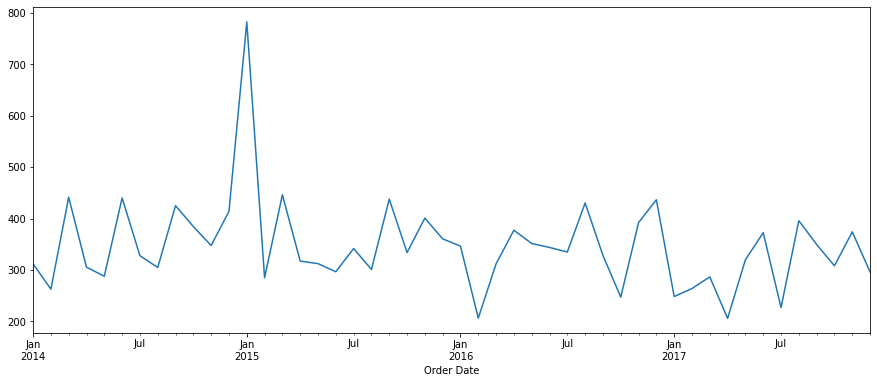

In [ ]:
sales.plot(figsize=(15, 6))
plt.show()

Interpretation

Some insights can be drawn from the above figure, the time series is patterned seasonally like sales are low at the beginning of every year, and sales increases at the end of the year.

visualize this data using the time series decomposition method which will allow our time series to decompose into three components:

1.Trend

2.Season

3.Noise

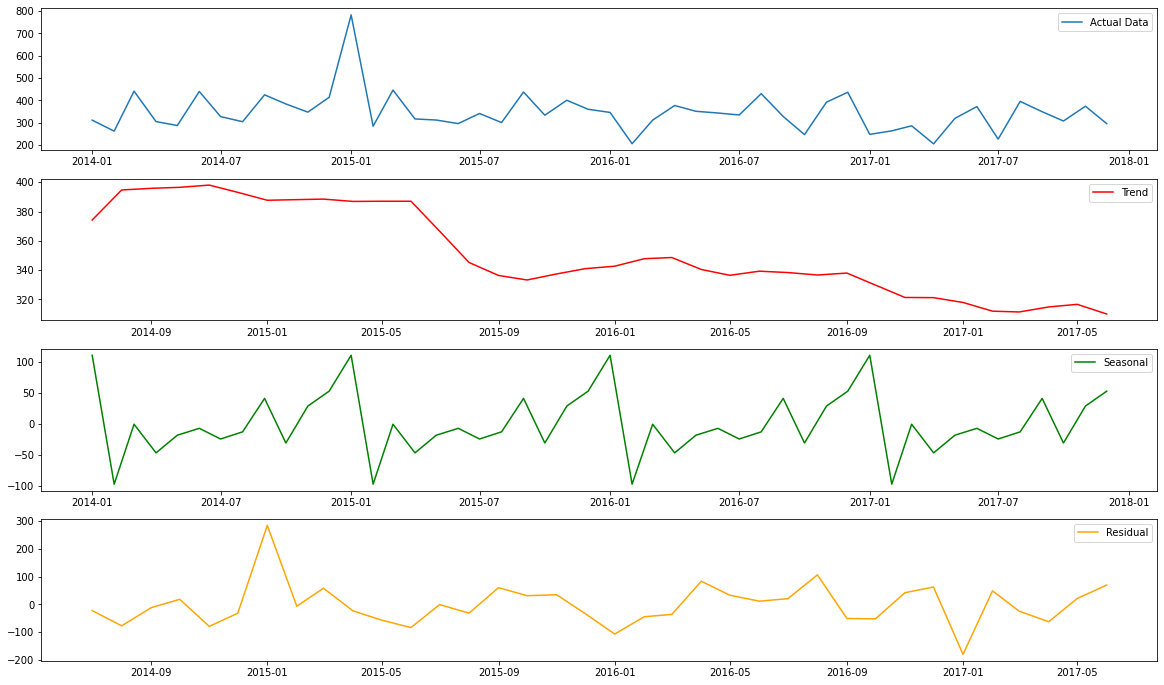

In [ ]:
# time series components
decomp =seasonal_decompose(sales, period = 12)
d_trend = decomp.trend
d_seasonal = decomp.seasonal
d_residual = decomp.resid

# plotting all 4 graphs


fig,ax = plt.subplots(4,1,figsize=(20,12))

plt.subplot(411)
plt.plot(sales,label='Actual Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='Trend',color='red')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(d_seasonal,label='Seasonal',color='green')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='Residual',color='orange')
plt.legend(loc='best')

Interpretation:

The above figure shows that the sales of furniture is not stable because of the seasons

Check data for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller # for dicky-fuller test

In [ ]:
# dicky-fuller test for stationarity
def checkstationarity(data):
    pvalue = adfuller(data)[1] #[1] gives the pvalue from adfuller
    
    if(pvalue > 0.05): 
       msg = 'p-value={}.Data is not stationary.Make the data stationary'.format(pvalue) 
    else:   
       msg = 'p-value={}.Data is stationary.Do model building'.format(pvalue)  
    return(msg)    

In [ ]:
checkstationarity(sales) # checking the stationarity of the data

'p-value=9.093398510006677e-10.Data is stationary.Do model building'

Plot ACF and PACF

In [ ]:
ratio = 0.7
ss1=int(len(sales)*ratio)
train = sales[:ss1]
test=sales[ss1:]

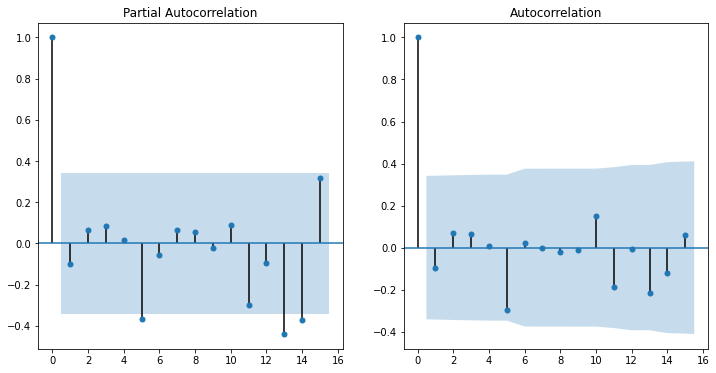

In [ ]:
_,ax=plt.subplots(1,2,figsize=(12,6))

plot_pacf(train, lags=15,ax=ax[0]);
plot_acf(train,lags=15,ax=ax[1]);

Time Series Forecasting with ARIMA

ARIMA is one of the most used methods in time series forecasting.

ARIMA stands for Autoregressive Integrated Moving Average.

Now I will use the ARIMA method in the further process of time series forecasting.

In [ ]:
p=[0,1,2,3]
q=[0,1]

p1=[]
q1=[]
aic1=[]
rmse1=[]

def modelcheck(p,q):
    p1.append(p)
    q1.append(q)
    model=ARIMA(train,order=(p,0,q)).fit()
    aic=model.aic
    aic1.append(aic)
    fcast = model.forecast(len(test))
    actual = []; pred = []
    for i in range(len(fcast)):
         actual.append(test[i])
         pred.append(fcast[i]) 
    df1 = pd.DataFrame({'actual':actual, 'predicted':pred})
    rmse=mean_squared_error(df1.actual,df1.predicted,squared=False)
    rmse1.append(rmse)

In [ ]:
'''for i in p:
    for j in q:
        modelcheck(i,j)

df_value = pd.DataFrame({"p":p1,"q":q1,"aic":aic1,"RMSE":rmse1})
df_value.sort_values('RMSE')           '''

In [ ]:
model_arima1=ARIMA(train,order=(3,0,0)).fit()
model_arima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   33
Model:                     ARMA(3, 0)   Log Likelihood                -196.367
Method:                       css-mle   S.D. of innovations             92.857
Date:                Fri, 11 Nov 2022   AIC                            402.734
Time:                        02:48:08   BIC                            410.216
Sample:                    01-01-2014   HQIC                           405.251
                         - 09-01-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         360.6376     16.876     21.370      0.000     327.562     393.713
ar.L1.Sales    -0.0935      0.172     -0.544      0.586      -0.431       0.243
ar.L2.Sales     0.0661      0.174      0.380      0.704      -0.275       0.407
ar.L3.Sales     0.0765      0.173      0.442      0.658      -0.263       0.415
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2536           -0.0000j            2.2536           -0.0000
AR.2           -1.5586           -1.8365j            2.4087           -0.3620
AR.3           -1.5586           +1.8365j            2.4087            0.3620
-----------------------------------------------------------------------------
"""

In [ ]:
fcast1=model_arima1.fittedvalues

In [ ]:
df2 = pd.DataFrame({'actual':sales,'forecast':fcast1})
len(df2)

48

In [ ]:
a = df2.iloc[0:30]

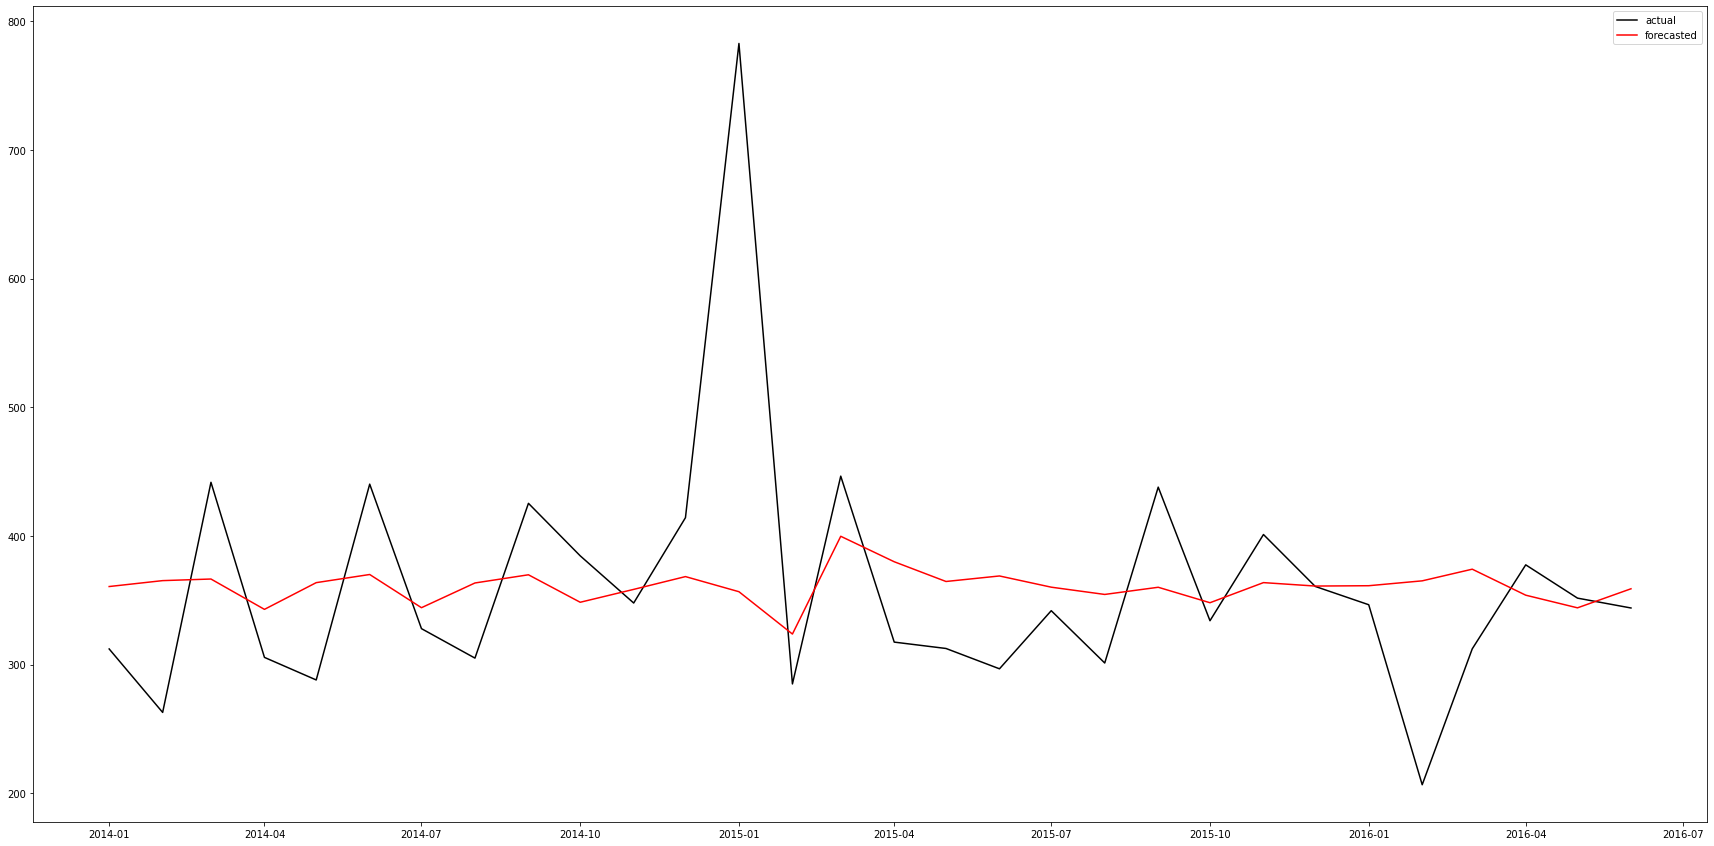

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(a['actual'], c='black',label='actual')
plt.plot(a['forecast'], c='red',label='forecasted')
plt.legend()
plt.show()

In [ ]:
mse1 = mean_squared_error(a.actual,a.forecast)
mse1

9287.864481956907

In [ ]:
aic1 = model_arima1.aic
aic1

402.7336368518462

In [ ]:
bic1=model_arima1.bic
bic1

410.2161746591786

In [ ]:
rmse1 = mean_squared_error(a.actual, a.forecast, squared=False)
rmse1

96.37356734061943

Build the SARIMA model
Predict the sales figures using test data
Forecast using the model

In [ ]:
sales_comp = seasonal_decompose(sales,period=12)
sales_seasonal = sales_comp.seasonal

In [ ]:
checkstationarity(sales_seasonal)

'p-value=0.0.Data is stationary.Do model building'

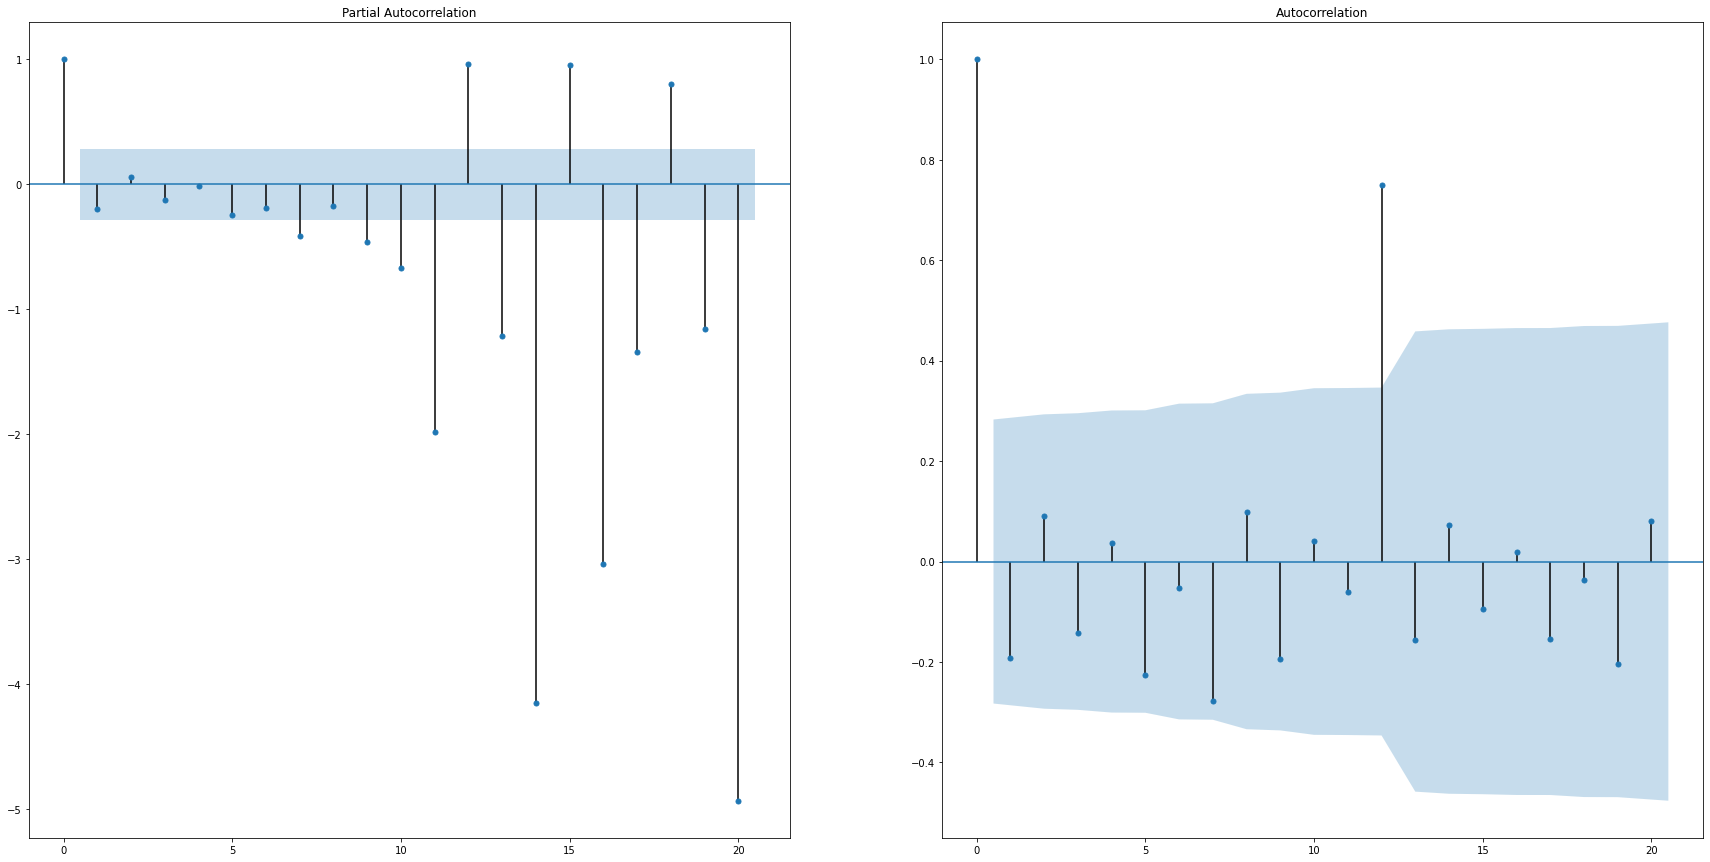

In [ ]:
_,ax=plt.subplots(1,2,figsize=(30,15))

plot_pacf(sales_seasonal, lags=20, ax=ax[0]);
plot_acf(sales_seasonal,lags=20,ax=ax[1]);

In [ ]:
p=3;q=0;d=0
P=3;Q=0;D=0
model_sarimax = sm.tsa.statespace.SARIMAX(sales,order=(p,d,q), seasonal_order=(P,D,Q,12)).fit()

In [ ]:
model_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 12)   Log Likelihood                -286.709
Date:                            Fri, 11 Nov 2022   AIC                            587.418
Time:                                    02:50:04   BIC                            600.516
Sample:                                01-01-2014   HQIC                           592.367
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1691      0.169      0.999      0.318      -0.163       0.501
ar.L2          0.2065      0.208      0.992      0.321      -0.201       0.614
ar.L3          0.5607      0.104      5.384      0.000       0.357       0.765
ar.S.L12       0.0574      0.125      0.459      0.646      -0.188       0.302
ar.S.L24      -0.0356      0.128     -0.277      0.782      -0.287       0.216
ar.S.L36       0.8439      0.095      8.867      0.000       0.657       1.030
sigma2      3307.6129   1737.304      1.904      0.057     -97.440    6712.666
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                25.91
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             0.71
Prob(H) (two-sided):                  0.21   Kurtosis:                         6.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

prediction using test:

In [ ]:
fcast_sarima=model_sarimax.forecast(len(test))

In [ ]:
df_sarima = pd.DataFrame({'actual':sales,'forecast':fcast_sarima})
df_sarima.head()

,actual,forecast
2014-01-01,312.126250,NaN
2014-02-01,262.808286,NaN
2014-03-01,441.635030,NaN
2014-04-01,305.570654,NaN
2014-05-01,288.032792,NaN


forecasting using model fitted values:

In [ ]:
fcast_sari= model_sarimax.fittedvalues

In [ ]:
df_sarimax = pd.DataFrame({'actual':sales,'forecast':fcast_sari})
df_sarimax.head()

,actual,forecast
Order Date,,
2014-01-01,312.126250,0.000000
2014-02-01,262.808286,272.572247
2014-03-01,441.635030,269.207540
2014-04-01,305.570654,315.345801
2014-05-01,288.032792,301.384123


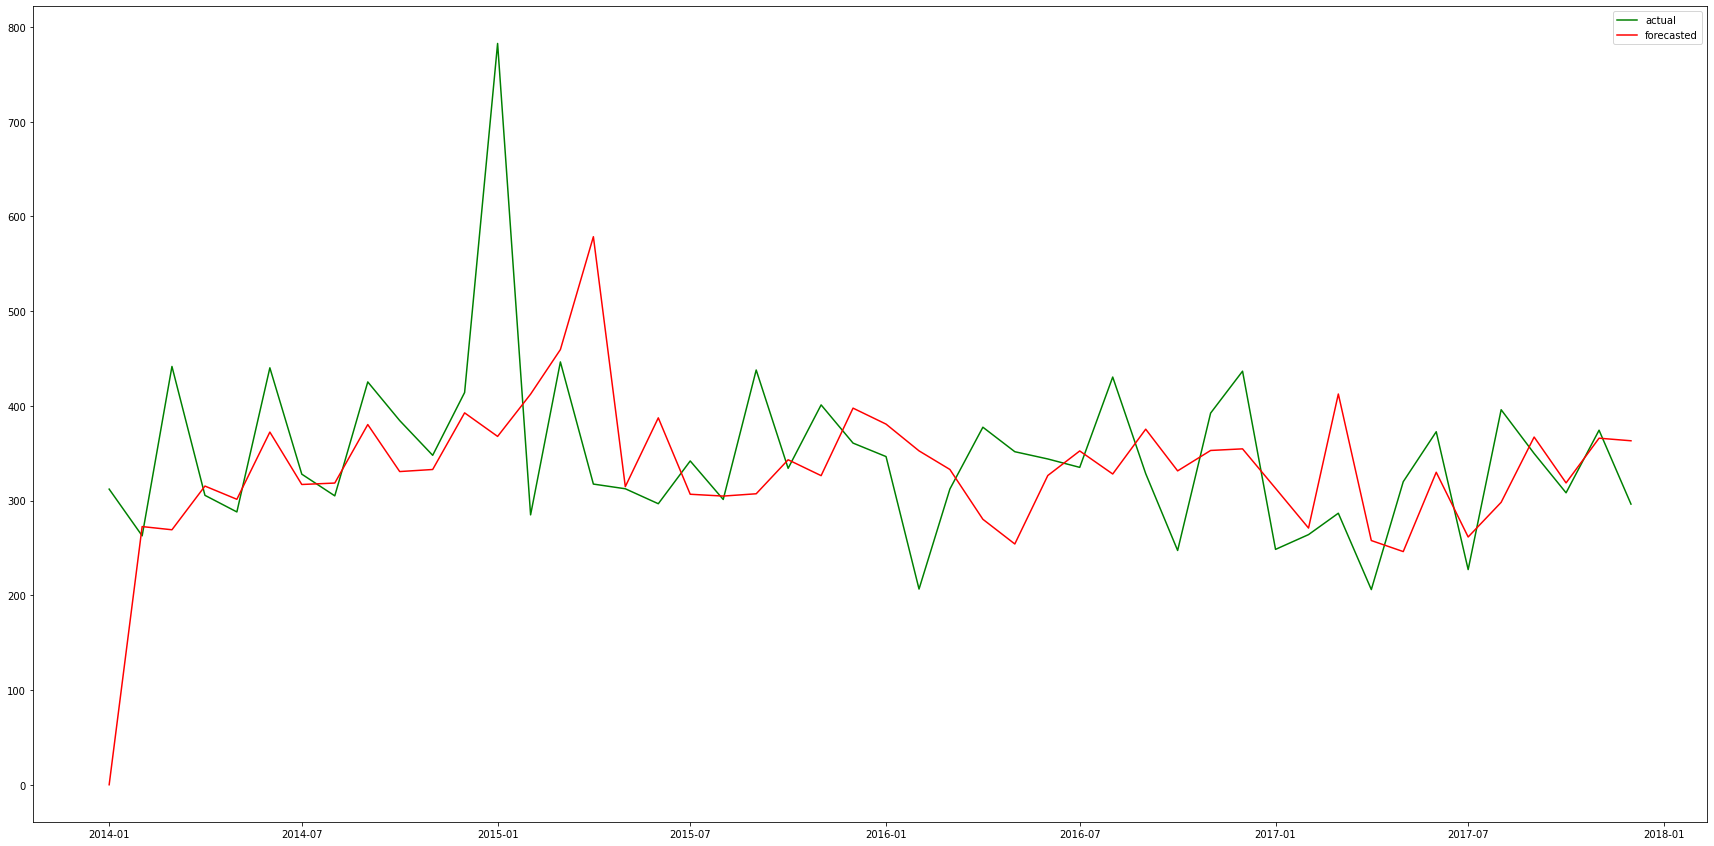

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(df_sarimax['actual'], c='green',label='actual')
plt.plot(df_sarimax['forecast'], c='red', label='forecasted')
plt.legend()
plt.show()

In [ ]:
mse2 = mean_squared_error(sales, fcast_sari)
mse2

11344.47185019119

In [ ]:
aic2 = model_sarimax.aic
aic2

587.4175108859012

In [ ]:
bic2 = model_sarimax.bic
bic2

600.5159179622564

In [ ]:
rmse2 = mean_squared_error(sales, fcast_sari, squared=False)
rmse2

106.51043071075804

comparison study of each model and decide the best one by looking at various evaluation parameters like MSE/RMSE/AIC/BIC

In [ ]:
results = list()
names = list()
results.append(rmse1)
names.append('Arma_rmse')
results.append(rmse2)
names.append('Sarima_rmse')
results.append(aic1)
names.append('Arma_Aic')
results.append(aic2)
names.append('Sarima_Aic')
results.append(bic1)
names.append('Arma Bic')
results.append(bic2)
names.append('Sarima_Bic')

In [ ]:
results

[96.37356734061943,
 106.51043071075804,
 402.7336368518462,
 587.4175108859012,
 410.2161746591786,
 600.5159179622564]

In [ ]:
names

['Arma_rmse',
 'Sarima_rmse',
 'Arma_Aic',
 'Sarima_Aic',
 'Arma Bic',
 'Sarima_Bic']

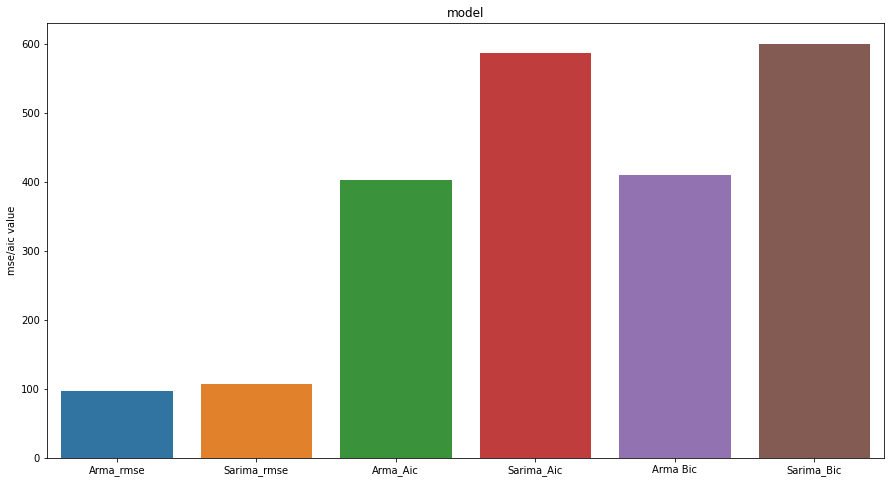

In [ ]:
import seaborn as sb
fig,ax=plt.subplots(figsize=(15,8))
sb.barplot(names,results);
plt.ylabel('mse/aic value')
plt.title("model");

In [ ]:
from tabulate import tabulate

data = [["ARIMA",mse1,rmse1, aic1, bic1],['SARIMA',mse2,rmse2,aic2,bic2]]
head=['MODEL','MSE','RMSE','AIC','BIC']
print(tabulate(data, headers=head, tablefmt='grid'))

+---------+----------+----------+---------+---------+
| MODEL   |      MSE |     RMSE |     AIC |     BIC |
+=========+==========+==========+=========+=========+
| ARIMA   |  9287.86 |  96.3736 | 402.734 | 410.216 |
+---------+----------+----------+---------+---------+
| SARIMA  | 11344.5  | 106.51   | 587.418 | 600.516 |
+---------+----------+----------+---------+---------+


Final Interpretation:

Hence, ARIMA MODEL performed better in terms of all evaluation parameters performed by achieving lower results for MSE,RMSE,AIC and BIC than Sarima